<a href="https://colab.research.google.com/github/yusptar/PCVK/blob/main/PCVK_Modul-5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import drive 
drive.mount('/content/drive')
import cv2 as cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import math
import glob

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Gamma Correction pada citra 
--------------------------------
Masukkan nilai Gamma: 3


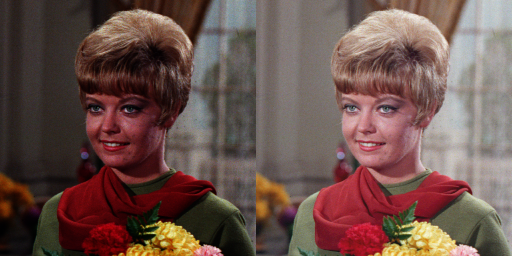

In [6]:
# Gamma Correction
print(' Gamma Correction pada citra ')
print('--------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

def gammaCorrection(src, gamma):
    invGamma = 1 / gamma

    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)

    return cv2.LUT(src, table)

original = cv2.imread('/content/drive/MyDrive/female.tiff')
gamma_image = gammaCorrection(original, 2.2)

final_frame = cv2.hconcat((original, gamma_image))
cv2_imshow(final_frame)

 Simulasi Image Depth 
--------------------------------


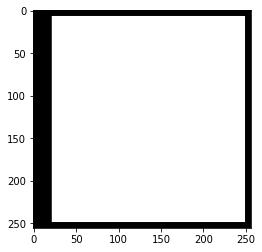

In [11]:
# Depth Image
print(' Simulasi Image Depth ')
print('--------------------------------')

# read left and right images
imgR = cv2.imread('/content/drive/MyDrive/female.tiff', 0)
imgL = cv2.imread('/content/drive/MyDrive/female.tiff', 0)
 
# creates StereoBm object
stereo = cv2.StereoBM_create(numDisparities = 16,
                            blockSize = 15)

# computes disparity
disparity = stereo.compute(imgL, imgR)
 
# displays image as grayscale and plotted
plt.imshow(disparity, 'gray')
plt.show()


In [17]:
# Average Denoising
cv_img = []
for img in glob.glob('/content/drive/MyDrive/noises/*.jpg'):
      n = cv2.imread(img)
      cv_img.append(n)

 Average Denoising 
--------------------------------
Masukkan jumlah citra average: 30


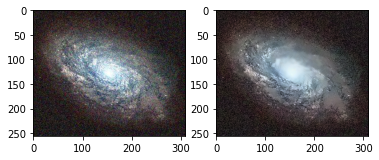

In [18]:
print(' Average Denoising ')
print('--------------------------------')
try:
  average = int(input('Masukkan jumlah citra average: '))
except ValueError:
  print('Error, not a number')

img = cv_img[1]

dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)

plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(dst)
plt.show()
